# 2.1 Градиентный алгоритм (градиентный спуск)

### Подвиг 5
_Напишите программу поиска точки минимума функции_

In [1]:
import numpy as np


def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.1 * x ** 3


def df(x):
    return 0.5 + 0.4 * x - 0.3 * x*x


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс
coord_y = func(coord_x) # значения по оси ординат (значения функции)
nu = 0.01
x = -4
n = 200
# здесь продолжайте программу
for i in range(n):
    x = x - df(x) * nu

    

### Подвиг 6
_Необходимо выполнить аппроксимацию (восстановление) функции на интервале [-5, 5]_

In [2]:
import numpy as np

# Исходная функция
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5

# Функция для вычисления градиента
model_a = lambda x, w: x @ w
Q = lambda w, X: 1/len(X) * sum([(model_a(xi, w) - func(xi[1]))**2 for xi in X])
grad_Q = lambda w, X: 2/len(X) * np.sum([(model_a(xi, w) - func(xi[1])) * xi.T for xi in X], axis=0)


# Значения по оси абсцисс и значения функции по оси ординат
coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)

# Начальные параметры
eta = np.array([0.1, 0.01, 0.001, 0.0001])  # шаг обучения для каждого параметра
w = np.array([0., 0., 0., 0.])  # начальные веса
N = 200  # количество итераций

X = np.array([[xi**i for i in range(4)] for xi in coord_x])
for _ in range(N):
    w = w - eta * grad_Q(w, X)

Q = Q(w, X)

# 2.2 Стохастический градиентный спуск SGD и алгоритм SAG

### Подвиг 6
_Необходимо выполнить аппроксимацию (восстановление) функции на интервале [-5, 5]_

In [3]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


# здесь объявляйте необходимые функции

def Q(w, x, y):
    x = np.array(x).reshape(-1, 1)
    return (w @ x - y)**2

def grad_Q(w, x, y):
    x = x.reshape(-1, 1)
    return 2*(w @ x - y) @ x.T

def xx(x):
    return np.array([1, x, x**2, np.cos(2*x), np.sin(2*x)])


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего

Qe = sum(Q(w, xx(x), y) for x, y in zip(coord_x, coord_y))/sz
np.random.seed(0) 

for _ in range(N):
    k = np.random.randint(0, sz-1) 
    w = w - eta * grad_Q(w, xx(coord_x[k]), coord_y[k])
    Qe = lm * Q(w, xx(coord_x[k]), coord_y[k]) + (1 - lm) * Qe
    
Q = sum(Q(w, xx(x), y) for x, y in zip(coord_x, coord_y))/sz

### Подвиг 7
_Необходимо выполнить  аппроксимацию (восстановление) функции на интервале [-4, 6]_

In [4]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# здесь объявляйте необходимые функции

def Q(w, x, y, k, batch_size):
    s = 0
    for i in range(k, k + batch_size):
        qwe = np.array(xx(x[i])).reshape(-1, 1)
        
        s += (w @ qwe - y[i])**2
    return s / batch_size
    

def grad_Q(w, x, y, k, batch_size):
    s = 0
    for i in range(k, k + batch_size):
        qwe = np.array(xx(x[i])).reshape(-1, 1)
        s += (w @ qwe - y[i]) * qwe.T
    return 2 * s / batch_size


def xx(x):
    return np.array([1, x, x**2, x**3])

# -------------------------------
coord_x = np.arange(-4.0, 6.0, 0.1) 
coord_y = func(coord_x) 

sz = len(coord_x)	
eta = np.array([0.1, 0.01, 0.001, 0.0001])
w = np.array([0., 0., 0., 0.])
N = 500 
lm = 0.02 
batch_size = 50 

Qe = Q(w, coord_x, coord_y, 0, sz)
np.random.seed(0) 
# -------------------------------


for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    w = w - eta * grad_Q(w, coord_x, coord_y, k, batch_size)
    Qe = lm * Q(w, coord_x, coord_y, k, batch_size) + (1 - lm) * Qe

Q = Q(w, coord_x, coord_y, 0, sz)
w = w[0]


# 2.3 Пример использования SGD при бинарной классификации образов

### Подвиг 4
_Вычислить веса $w$ для данных_

In [5]:
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    x = np.array(x)
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / (1 + np.exp(-M) * np.log(2))




data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]


qwe = lambda a, b: 1 if a * b < 0 else 1

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)
sz = len(data_x)
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

Qe = sum(loss(w, x_train[i], y_train[i]) for i in range(len(data_x)))/sz
np.random.seed(0)



for i in range(N):
    k = np.random.randint(0, n_train-1)
    loss_k = loss(w, x_train[k], y_train[k])
    grad = df(w, x_train[k], y_train[k])
    w = w - nt * grad
    Qe = lm * loss_k + (1 - lm) * Qe

Q = np.mean([w @ x_train[i] * y_train[i] < 0 for i in range(n_train)])


### Подвиг 5
_Вычислить веса $w$ для данных_

In [19]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    x = np.array(x)
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

sz = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

Qe = sum(loss(w, x_train[i], y_train[i]) for i in range(len(data_x)))/sz
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу

for i in range(20):
    M = np.dot(w, x_train[k]) * y_train[k]
    k = np.random.randint(0, sz-1)
    loss_k = loss(w, x_train[k], y_train[k])
    grad = df(w, x_train[k], y_train[k])
    # w = w - nt * grad
    # Qe = lm * loss_k + (1 - lm) * Qe
    



In [20]:
w1 = np.array([-6.67250056, -0.69843118, -0.11899156])
x2 = np.array([1,  5.5, 1.3])
qwe3 = -1
M = 11.72808596677911
asd = -np.exp(-M) * x2.T * qwe3
asd

array([8.06411999e-06, 4.43526600e-05, 1.04833560e-05])

In [8]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  
w = np.array([0.0, 0.0, 0.0])
nt = np.array([0.5, 0.01, 0.01]) 
lm = 0.01  
N = 500  
batch_size = 10 

Qe = np.mean([loss(w, x_train[i], y_train[i]) for i in range(n_train)])
np.random.seed(0) 

for _ in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    Qk = np.mean([loss(w, x_train[i], y_train[i]) for i in range(k, k + batch_size)])
    grad_Qk = 1/batch_size * np.sum([df(w, x_train[i], y_train[i]) for i in range(k, k + batch_size)], axis=0) 
    w = w - nt * grad_Qk
    Qe = lm * Qk + (1-lm) * Qe

Q = np.mean([w @ x_train[i] * y_train[i] < 0 for i in range(n_train)])
w = w.tolist()
Q

0.07

# 2.4 Оптимизаторы градиентных алгоритмов: RMSProp, AdaDelta, Adam

### Подвиг 3
_Напишите программу поиска точки минимума функции с помощью градиентного алгоритма с методом импульсов:_

In [9]:
import numpy as np


def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def grad_f(x):
    return -0.5 + 0.4*x - 0.09*x**2 - 1.2*np.cos(4*x)

def momentum(nu, w, x):
    return 0.8 * w + 0.2 * nu * grad_f(x)

nu = 0.1
x = -3.5
N = 200
w = 0


for _ in range(N):
    # w = momentum(nu, w, x)
    x -= nu * grad_f(x)
    
x

-0.9465345999520599

#### Подвиг 3 (решение обычным градиеном с визуализацией)

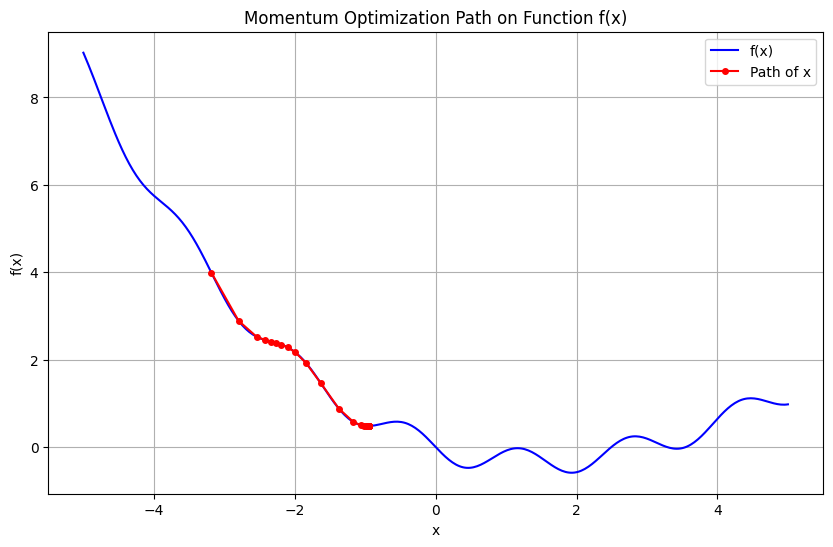

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Functions
def func(x):
    return -0.5 * x + 0.2 * x**2 - 0.01 * x**3 - 0.3 * np.sin(4*x)

def grad_f(x):
    return -0.5 + 0.4*x - 0.09*x**2 - 1.2*np.cos(4*x)

def momentum(nu, w, x):
    return 0.8 * w + 0.2 * nu * grad_f(x)

# Parameters
nu = 0.1
x = -3.5
N = 200
w = 0

# Store x values for visualization
x_vals = []

# Perform momentum optimization
for _ in range(N):
    
    x -= nu * grad_f(x)
    x_vals.append(x)

# Plot the function and the path taken by x during optimization
x_range = np.linspace(-5, 5, 400)
y_range = func(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x)", color='blue')
plt.plot(x_vals, func(np.array(x_vals)), 'ro-', label="Path of x", markersize=4)

plt.title("Momentum Optimization Path on Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


### Подвиг 4
_Напишите программу поиска точки минимума функции с помощью градиентного алгоритма с методом импульсов Нестерова_

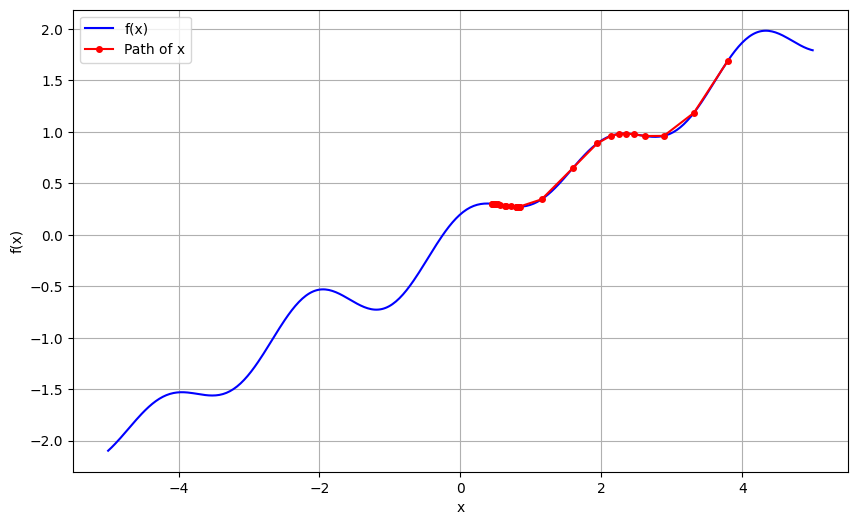

In [21]:
import numpy as np


def func(x):
    return 0.4 * x + 0.1 * np.sin(2*x) + 0.2 * np.cos(3*x)

def grad_f(x):
    return 0.4 + 0.2 * np.cos(2*x) - 0.6 * np.sin(3*x)

def nestorov(x, v):
    return 0.7 * v + 0.3 * grad_f(x - 0.7 * v)

# Store x values for visualization
x_vals = []

nu = 1
x = 4
v = 0
N = 500
for _ in range(N):
    v = nestorov(x, v)
    x -= v
    x_vals.append(x)

# Plot the function and the path taken by x during optimization
x_range = np.linspace(-5, 5, 400)
y_range = func(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x)", color='blue')
plt.plot(x_vals, func(np.array(x_vals)), 'ro-', label="Path of x", markersize=4)


plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()



### Подвиг 5
_Напишите программу поиска точки минимума функции с помощью градиентного алгоритма с оптимизатором RMSProp_

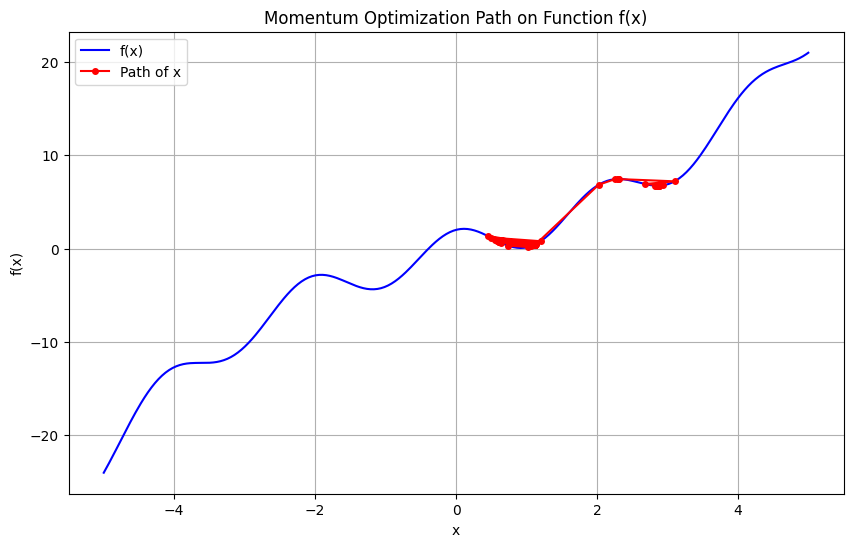

In [12]:
import numpy as np


def func(x):
    return 2 * x + 0.1 * x ** 3 + 2 * np.cos(3*x)

def grad_f(x):
    return 2 + 0.3 * x ** 2 - 6 * np.sin(3*x)

def RMSProp(g, x):
    return 0.8 * g + 0.2 * grad_f(x) ** 2

nu = 0.5
N = 200
g = 0
e = 0.01
x = 4
x_vals = []
for _ in range(N):
    g = RMSProp(g, x)
    x -= nu * (grad_f(x)/(np.sqrt(g) + e))
    
    x_vals.append(x)

# Plot the function and the path taken by x during optimization
x_range = np.linspace(-5, 5, 400)
y_range = func(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x)", color='blue')
plt.plot(x_vals, func(np.array(x_vals)), 'ro-', label="Path of x", markersize=4)

plt.title("Momentum Optimization Path on Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()    

### Подвиг 6
_Необходимо выполнить аппроксимацию (восстановление) функции на интервале [-4, 6]_

In [13]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2


# здесь объявляйте необходимые функции
def Q(w, x, y):
    return (w @ x - y)**2


def grad_Q(w, gamma, v, x, y):
    x = np.array(x)
    return 2 * (np.dot(w - gamma * v, x) - y) * x


def momentum_neterov(gamma, eta, v, w, x, y, k):
    return gamma * v + (1 - gamma) * eta * np.mean([grad_Q(w, gamma, v, xx(x[i]), y[i]) for i in range(k, k+20)], axis=0)


xx = lambda x: [x**i for i in range(4)]

coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001])
w = np.array([0., 0., 0., 0.]) 
N = 500 
lm = 0.02 
batch_size = 20
gamma = 0.8 
v = np.zeros(len(w)) 

Qe = np.mean([Q(w, xx(coord_x[i]), coord_y[i]) for i in range(sz)])
np.random.seed(0) 

# здесь продолжайте программу
for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    Qk = (np.mean([Q(w, xx(coord_x[i]), coord_y[i]) for i in range(k, k + 20)]))
    v = momentum_neterov(gamma, eta, v, w, coord_x, coord_y, k)
    w = w - v
    #print(Qe)
    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([Q(w, xx(coord_x[i]), coord_y[i]) for i in range(sz)])
Q

0.020238188136794403

In [14]:
import numpy as np


def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2

def model_a(w, x):
    return w @ x

def loss(w, x):
    return (model_a(w, x) - func(x[1]))**2

def grad_loss(w, x):
    return 2 * (model_a(w, x) - func(x[1])) * x.T



coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

sz = len(coord_x)	
eta = np.array([0.1, 0.01, 0.001, 0.0001])
w = np.array([0., 0., 0., 0.]) 
N = 500 
lm = 0.02 
batch_size = 20
gamma = 0.8 
v = np.array([0., 0., 0., 0.]) 
X = np.array([[xi**n for n in range(len(w))] for xi in coord_x])
Qe = np.mean([loss(w, x) for x in X]) 
np.random.seed(0) 
for _ in range(N):
    k = np.random.randint(0, sz - batch_size - 1)
    Qk = np.mean([loss(w, X[i]) for i in range(k, k + batch_size)])
    grad_Qk = 1/batch_size * np.sum([grad_loss(w - gamma * v, X[i]) for i in range(k, k + batch_size)], axis=0)
    v = gamma * v + (1 - gamma) * eta * grad_Qk
    w = w - v
    Qe = lm * Qk + (1 - lm) * Qe
    #print(Qe)
    
Q = np.mean([loss(w, x) for x in X]) 
Q

0.02023818813679436

### Подвиг 7
_Вычислить весовой вектор_

In [22]:
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / (1 + np.exp(-M) * np.log(2))


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

alpha = 0.7 # параметр для RMSProp
G = np.zeros(len(w))  # параметр для RMSProp
eps = 0.01 # параметр для RMSProp

# Qe =  начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу







### Подвиг 6 (повтор)